# Part II, Interacting with the archive "in different ways"

This is part 4 of the DANDI User Training on Nov 1, 2021.

In the previous parts you have already briefly interacted with the archive via the [Web UI](https://gui.dandiarchive.org/), the `dandi` command line interface (CLI), and have even used the `dandi` Python library to access sample files directly from the Python interpreter.  

*Note*: Both the CLI and the Python library are provided by the [dandi](https://pypi.org/project/dandi) package on PyPI (and Conda), with the underlying codebase being available on GitHub as https://github.com/dandi/dandi-cli/.

In this part we will explore more of the `dandi` CLI/Python library functionality, and introduce you to the DANDI acrhive API server, which allows you to interact with the archive directly from the CLI or programming language of your choice (e.g., MATLAB).

## dandi Command Line interface


The [DANDI Handbook](https://www.dandiarchive.org/handbook/10_using_dandi) provides a brief introduction to various functions of the `dandi` CLI, which we will practice using in this section.

As with any *sane* command line tool, `dandi` provides brief documentation on its usage if you add `--help` to its invocation:

*Note:* in the code cell below you see commands prefixed with `!`. This annotation instructs the Jupyter notebook to run that command in bash. You could achieve the same effect by running that command in the Terminal, without typing leading `!`.  In the exercises below please run these commands in the Terminal.

In [1]:
!dandi --help

Usage: dandi [OPTIONS] COMMAND [ARGS]...

  A client to support interactions with DANDI archive
  (http://dandiarchive.org).

  To see help for a specific command, run

      dandi COMMAND --help

  e.g. dandi upload --help

Options:
  --version
  -l, --log-level [DEBUG|INFO|WARNING|ERROR|CRITICAL]
                                  Log level (case insensitive).  May be
                                  specified as an integer.  [default: INFO]
  --pdb                           Fall into pdb if errors out
  --help                          Show this message and exit.

Commands:
  delete            Delete dandisets and assets from the server.
  digest            Calculate file digests
  download          Download a file or entire folder from DANDI
  instances         List known Dandi Archive instances that the CLI can...
  ls                List .nwb files and dandisets metadata.
  organize          (Re)organize files according to the metadata.
  shell-completion  Emit shell script for en

which provides you with the overall syntax for using the `dandi` CLI, and lists commands and common options which could be specified right after `dandi` and before any particular `COMMAND`.

More information on a particular command could be obtained by adding `--help` *after* the `COMMAND`, e.g.:

In [2]:
!dandi ls --help

Usage: dandi ls [OPTIONS] [PATHS]...

  List .nwb files and dandisets metadata.

  Patterns for known setups:
   - DANDI:<dandiset id>
   - https://dandiarchive.org/...
   - https://identifiers.org/DANDI:<dandiset id>
   - https://<server>[/api]/[#/]dandiset/<dandiset id>[/<version>][/files[?location=<path>]]
   - https://*dandiarchive-org.netflify.app/...
   - https://<server>[/api]/dandisets/<dandiset id>[/versions[/<version>]]
   - https://<server>[/api]/assets/<asset id>[/download]
   - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/<asset id>[/download]
   - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/?path=<path>
   - dandi://<instance name>/<dandiset id>[@<version>][/<path>]
   - https://<server>/...

Options:
  -F, --fields TEXT               Comma-separated list of fields to display.
                                  An empty value to trigger a list of
                                  available fields to be printed out
  

which as you can see has a number of options which could become handy.

Let's try the `dandi ls` command right away on the dandiset you created in the previous section. 

1. In the Terminal (recommendation - make it wide) run

```shell
dandi ls -r data/100507  # <-- path to your dandiset here
```
which should present you with a tabular view of metadata for dandiset and the asset(s) you have in it.  

2. Such view could be quite "busy". To provide a more useful/targeted listing of data at hand, use the `-F` option to only view a subset of fields, e.g. add `-F age,session_id`.

3. Try `-f` to change the format of the output (e.g., from tabular to YAML).

*Note:* if you point `ls` to a single file, by default it would produce YAML output.

4. As the `dandi ls --help` output suggested, it can also operate on remote dandisets available from DANDI archive. When pointed to a remote URL though, it outputs information about the assets as known to the archive, and places metadata into a `metadata` key.  In the Terminal, try

```shell
dandi ls -r -f yaml --metadata all DANDI:000037
```

this will list the top-level metadata of the dandiset, as well as metadata for each individual asset.

*Note:* As you can see from the above invocation, `ls` (as well, as `download`) supports URLs which you can simply copy/paste from the browser while navigating https://gui.dandiarchive.org .

5. You could also point to a specific folder, e.g. while navigating it in the web UI:

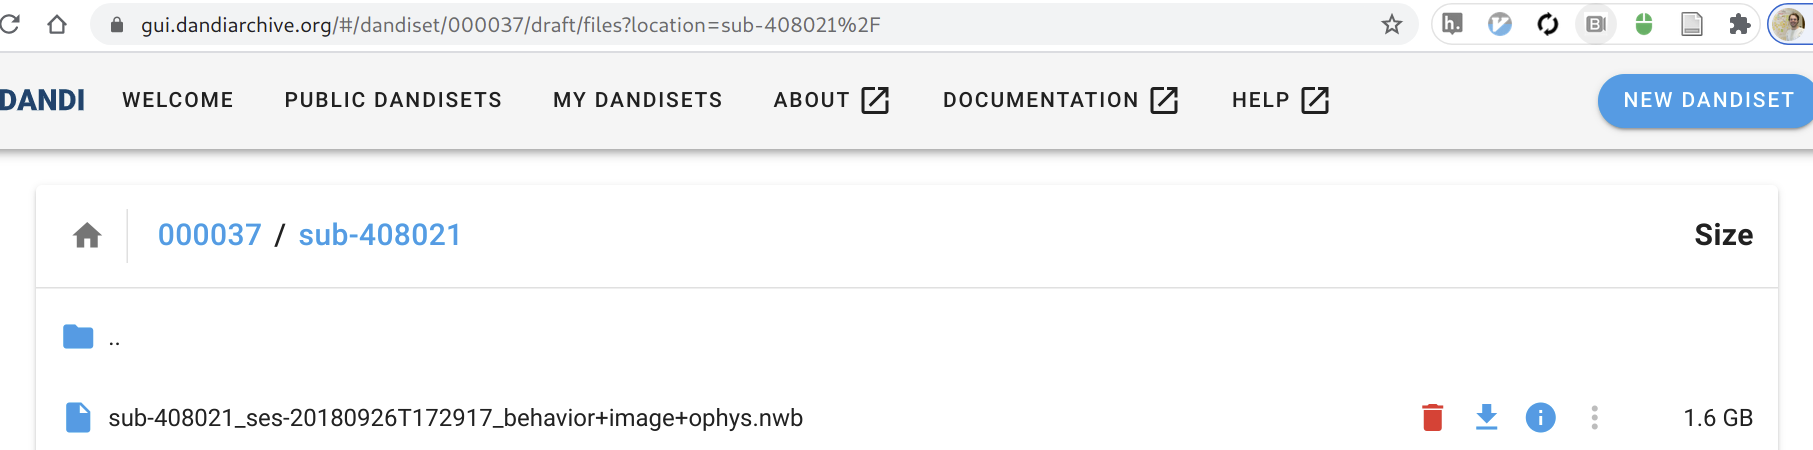

Copy/paste the URL you see in the browser address bar to your `dandi ls` invocation in the Terminal.

6. You can also download individual files if you copy the URL from the browser's context menu with the download icon:

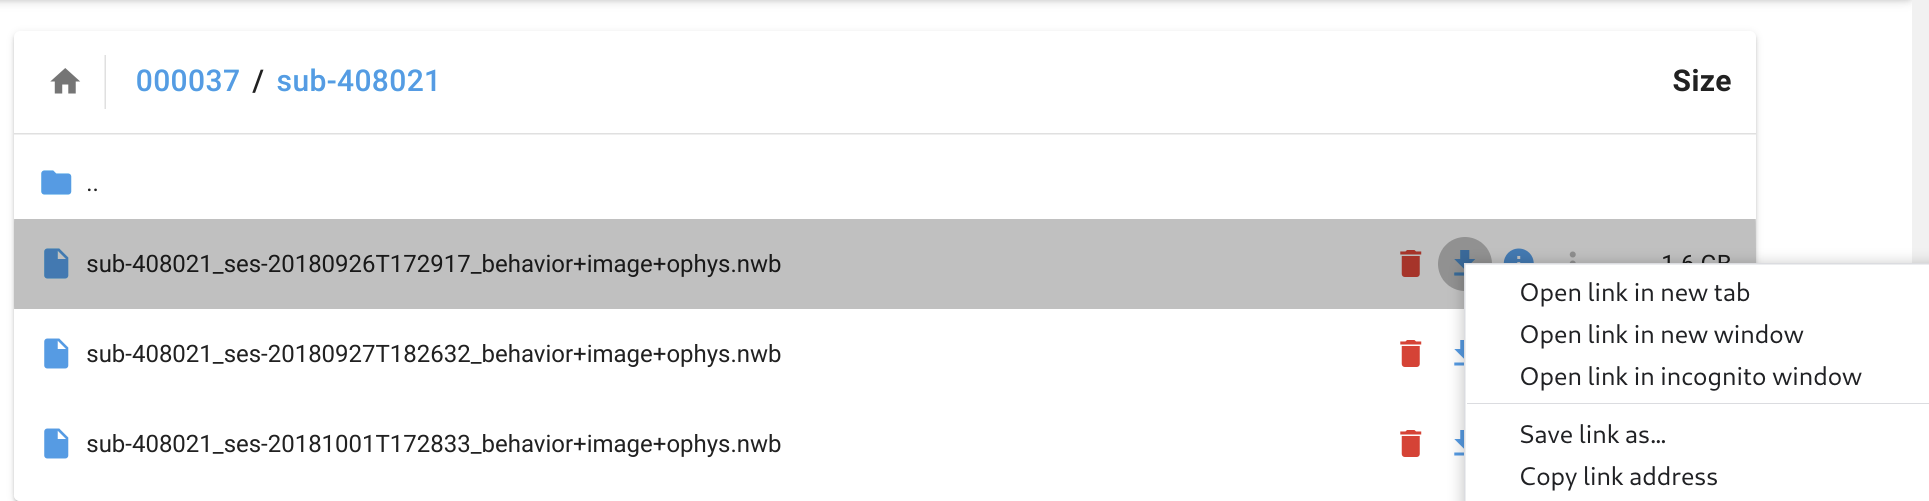

and paste it into `dandi ls` invocation.


**NOTE:** When embedding URLs into your analysis scripts, we **strongly** recommend using persistent URLs, such as URLs to the API server, `DANDI:<id>` identifiers, or `dandi://<instance name>/<dandiset id>[@<version>][/<path>]`. When citing dandisets in publications it is best to use DOIs.

To try this out, run

```shell
dandi ls --metadata all https://api.dandiarchive.org/api/assets/834a2598-927c-4d56-91c6-92eeb9ef005c/download/
```
you can also try out some other files (AKA assets) in the archive.

### dandi download - Download dandisets/folders/files from the archive

`dandi download` is probably the most frequently used command by a "data consumer" user interested primarily in data download.

Let's first see which options it provides: 

In [3]:
!dandi download --help

Usage: dandi download [OPTIONS] [URL]...

  Download a file or entire folder from DANDI

Options:
  -o, --output-dir DIRECTORY      Directory where to download to (directory
                                  must exist). Files will be downloaded with
                                  paths relative to that directory.
  -e, --existing [error|skip|overwrite|overwrite-different|refresh]
                                  What to do if a file found existing locally.
                                  'refresh': verify that according to the size
                                  and mtime, it is the same file, if not -
                                  download and overwrite.  [default: error]
  -f, --format [pyout|debug]      Choose the format/frontend for output. TODO:
                                  support all of the ls
  -J, --jobs INTEGER              Number of parallel download jobs.  [default:
                                  6]
  --download [assets,dandiset.yaml,all]
             

Please review the options. And although it does not say it yet, the `download` command supports all those URL patterns which you saw listed by `dandi ls`. `dandi download` will provide you with them if you enter some unrecognized URL, e.g.:

In [4]:
!dandi download from-the-ether

2021-11-01 15:06:46,026 [    INFO] Logs saved in /home/jovyan/.cache/dandi-cli/log/20211101150645Z-554.log
Error: We do not know how to map URL from-the-ether to our servers.
Patterns for known setups:
 - DANDI:<dandiset id>
 - https://dandiarchive.org/...
 - https://identifiers.org/DANDI:<dandiset id>
 - https://<server>[/api]/[#/]dandiset/<dandiset id>[/<version>][/files[?location=<path>]]
 - https://*dandiarchive-org.netflify.app/...
 - https://<server>[/api]/dandisets/<dandiset id>[/versions[/<version>]]
 - https://<server>[/api]/assets/<asset id>[/download]
 - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/<asset id>[/download]
 - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/?path=<path>
 - dandi://<instance name>/<dandiset id>[@<version>][/<path>]
 - https://<server>/...


so you can download an entire dandiset, with all the assets if you provide a resource identifier (e.g., `DANDI:000027`) or a URL to that dandiset as you copy paste it from the browser (e.g. https://gui.dandiarchive.org/#/dandiset/000027/).

If a URL points to the staging DANDI archive, `dandi download` will interact with that server.

Keeping in mind the options and URL patterns listed above, and try the following out in a Terminal:

1. Download the entire [000027](https://gui.dandiarchive.org/#/dandiset/000027) dandiset (from the main archive).

*Note:* if a dandiset was already published, and the version is not contained in the URL, `download` will download the most recent release, and not the "draft" version

2.  Download a `draft` version of 000027 into some other folder.

3. ("optional"- bonus point) What is different between draft and published (0.210831.2033) version of the dandiset?

   *Hint:* `diff -Naur folder1/ folder2/` could be used in the Terminal to find an answer.


4. Download the `sub-anm369962/` folder from `000006` dandiset. 

### dandi validate - Validate NWB files before upload

is a very useful command for any "data producer". As we have mentioned in the previous portion of the User Guide, all data uploaded to the DANDI archive must follow established standards such as [NWB](https://www.nwb.org/nwb-neurophysiology/) and [BIDS](https://bids-specification.readthedocs.io/). To ensure standard compliance `dandi upload` validates all files intended for upload and skips (by default) any file which fails validation.

`dandi validate` should be used before the upload of data to ensure that `.nwb` files do not have any internal NWB inconsistencies, and contain metadata required by DANDI archive. At the moment, the interface of the `validate` command is very trivial:

In [5]:
!dandi validate --help

Usage: dandi validate [OPTIONS] [PATHS]...

  Validate files for NWB (and DANDI) compliance.

  Exits with non-0 exit code if any file is not compliant.

Options:
  --help  Show this message and exit.


In [7]:
!dandi validate ../data/ecephys_example.nwb  # <-- put path to the .nwb files you want to validate here

2021-11-01 15:08:01,558 [    INFO] Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
2021-11-01 15:08:01,559 [    INFO] Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-01 15:08:01,559 [    INFO] NumExpr defaulting to 8 threads.
2021-11-01 15:08:03,211 [    INFO] ../data/ecephys_example.nwb: ok
Summary: No validation errors among 1 file(s)
2021-11-01 15:08:03,211 [    INFO] Logs saved in /home/jovyan/.cache/dandi-cli/log/20211101150800Z-724.log


## dandi Python library

The `dandi` command line interface we have practiced with above is a part of the `dandi` Python package, which also provides Python interfaces to interact with any instance of the DANDI archive (*hint*: the `dandi instances` command will list known instances of the archive).

In the previous section you already used the library in the following Python code snippet:

```python
from dandi.dandiapi import DandiAPIClient

with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, "draft").get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

```

https://dandi.readthedocs.io provides documentation not only on CLI, but also on Python interfaces.

[dandi.dandiapi](https://dandi.readthedocs.io/en/latest/modref/dandiapi.html) module used in the snippet above provides high level interfaces which you can use in your scripts or applications.

1. There is an example at the start of the [the dandi.dandiapi](https://dandi.readthedocs.io/en/latest/modref/dandiapi.html) documentation. Copy/paste and edit, or enter it in the cell below, and modify it to just list all dandisets in the main instance of the archive:

*Hint:* You can "run" the code by pressing "Shift-Enter" or clicking on "Run" button in the menu.

In [8]:
# enter your Python code here

2. Following the original example and/or documentation, get an object representing the dandiset of interest to you (e.g. `000006`) and download one of the assets using Python code:

In [9]:
# enter your Python code here

## DANDI API Server

All components (such as the https://gui.dandiarchive.org web interfiace) and tools (such as the `dandi` CLI and Python library) interact with the archive via the DANDI API (Application Programming Interface), which is provided by the `https://api.dandiarchive.org` server. This API server is the "Heart" of the archive, which manages all dandisets and assets in the archive and orchestrates access and deposition of data to AWS S3 bucket.

All code of the DANDI API server is available openly from https://github.com/dandi/dandi-api/ . A number of convenient interfaces are available to help you learn about what features it provides, and how to interact with the server.

Both production and staging servers have a [Swagger](https://swagger.io/) interface, which you can reach by going to https://api.dandiarchive.org/swagger/ for production (and https://api-staging.dandiarchive.org/swagger/ for staging, which is where your test datasets are):

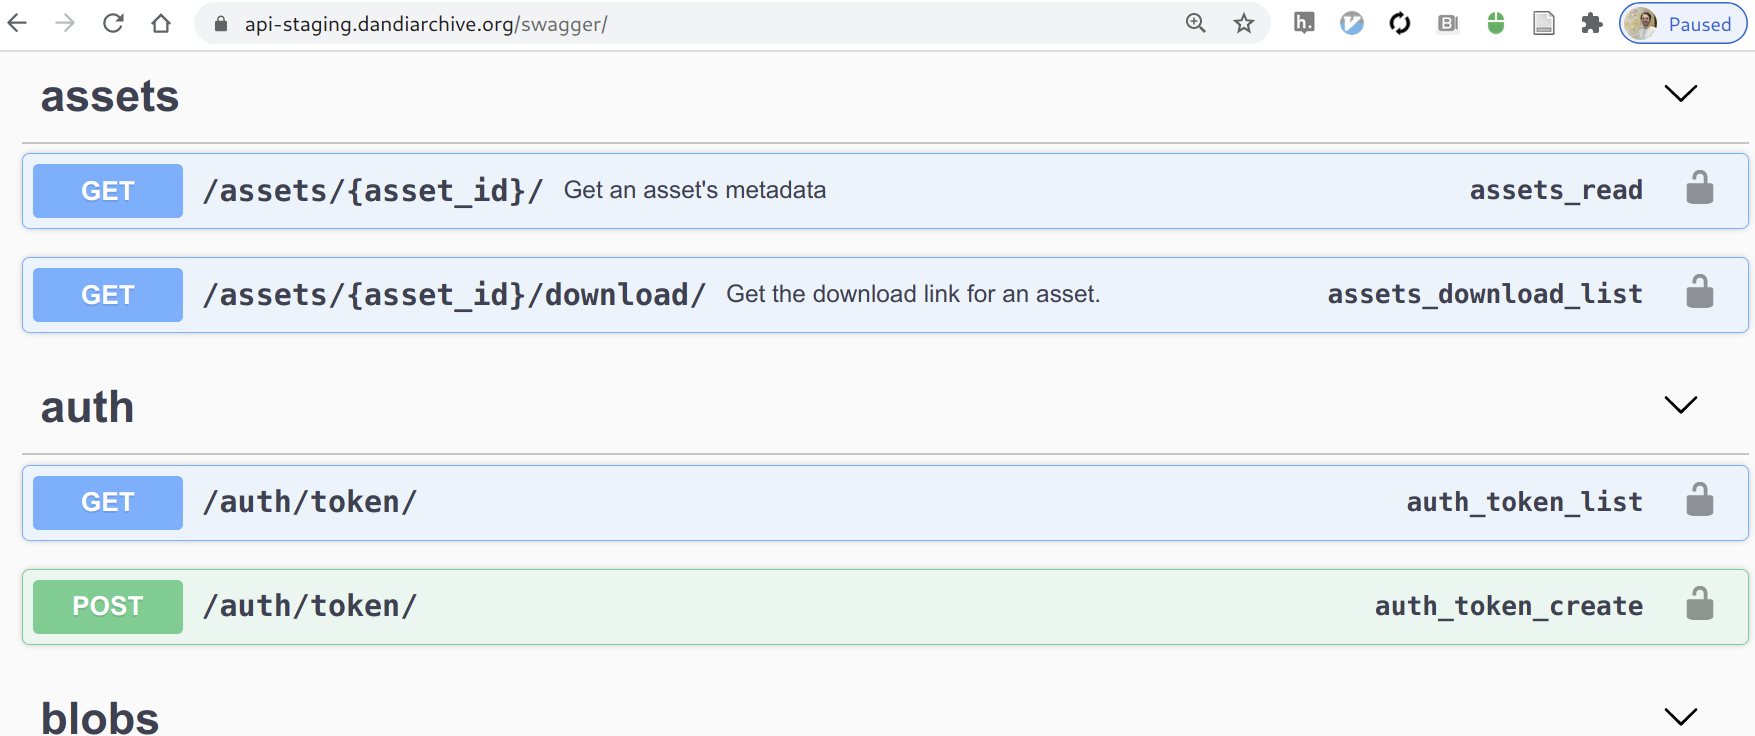

Read-only interaction with the archive (such as listing dandisets, their assets, etc.) does not even require authentication, and in the following brief exercises we will interact with the API server directly in the Terminal, but such interactions could be coded virtually in any programming language.

*Note:* For the production server we also have https://dandi.readme.io , which provides even better UI and code snippets in wide range of languages.

1. List dandisets known to the archive

- Find "GET `/dandisets/`" end point in swagger interface
- Click on that row to expand it down and reveal options for that call
- Click on "Try it out" button, possibly scroll down after the options, until you see "Execute" button
- Click on "Execute"

After a short while you will see the response in its entirety below, alongside a [curl](https://curl.se/) invocation which you can copy and paste into your Terminal to execute, and to obtain a similar result.

2. List assets "under a path"

- Choose a dandiset ID (`versions__dandiset__pk` within Swagger interface for `/assets` end points), e.g. `000006` you would like to list assets for
- Find end point for function `dandisets_versions_assets_list`
- If you do not enter any value any value for the `path` option -- all assets of the dandiset will be listed. If you enter some path -- all assets under that path (including immediately in that directory or any subdirectory below) will be listed.
- For dandiset version (`versions__version` within Swagger interface) you can enter specific existing version of the dandiset (if was published) or "draft" version
- Click on "Execute"

---

Although these exercises are simplistic, and typically you would not interact with the archive through the API (but rather use the `dandi` CLI or Python library), we hope understanding that all operations could also be programmed in any language of your choice can encourage you to interface with the DANDI archive across all platforms, software or web applications you work on.

## DataLad dandisets

If you like `git` and/or are interested in using a data management system to take control over your code, data, and computing environment, [DataLad](https://www.datalad.org) provides a solution. A recent [DataLad paper in JOSS](https://joss.theoj.org/papers/10.21105/joss.03262) provides a concise introduction and overview of the features, the [DataLad Handbook](http://handbook.datalad.org/) is a trove of knowledge about DataLad, and the [DataLad YouTube channel](https://www.youtube.com/datalad) has many informational videos and tutorials.

In a nutshell: All dandisets in the main DANDI archive (not staging) are also made available as DataLad datasets from GitHub: https://github.com/dandisets . 

*Note:* they are updated regularly but not in real time, so it takes up to a day for the most recent changes to be propagated. 

One of the very convenient features of DataLad is the ability to provide a "view" of the entire "tree" of files in the dandiset (locally, and without downloading all of its content at once). All files under DataLad control are unambiguously version controlled (it is all [git](https://git-scm.com/) and [git-annex](https://git-annex.branchable.com/) underneath). But even beyond the reliability advantages of version control, DataLad makes it easy to `get`, or later `drop`, any needed content without figuring out where any particular file needs to be downloaded from.

For a brief example, let's quickly "install" the 000026 dandiset, the size of which is over 11TB if downloaded in full, and `get` and `drop` some files.

1. In the Terminal run 

```shell
datalad install https://github.com/dandisets/000026
cd 000026
```

2. Use regular `cd` and `ls` commands to navigate through the dataset.

3. Use `datalad get PATHs` to get content for file(s) or folder(s) of interest.

4. Use `datalad drop PATHs` to drop the content and reclaim local disk space.

A complete example on a tiny test dandiset.  You are welcome to try on other dandisets:

```shell
datalad install https://github.com/dandisets/000027
cd 000027
datalad get sub-RAT123/
# now you have access to the files under that directory - can use `dandi ls` etc
# and after you are done working with that data, you are ready to drop the content
datalad drop sub-RAT123/
```